# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import regex as re

# para pintar
import pylab as plt
import seaborn as sns

#para que salga el grafico
%matplotlib inline

## Regression Model Evaluation

In [4]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
# regresion lineal

y_pred1 = linreg.predict(X_test)

In [17]:
# regresion lineal

y_pred2 = linreg.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [19]:
from sklearn.metrics import r2_score as r2
#para training
r2(y_train, y_pred2)

0.7295941389826617

In [20]:
from sklearn.metrics import r2_score as r2
#para test
r2(y_test, y_pred1)

0.7657465943591124

## 4. Calculate and print mean squared error for both the training and the testing set.

In [21]:
from sklearn.metrics import mean_squared_error as mse   
#para test
mse(y_test, y_pred1)

20.77068478427002

In [22]:
from sklearn.metrics import mean_squared_error as mse   
#para train
mse(y_train, y_pred2)

22.534576008227237

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [23]:
from sklearn.metrics import mean_absolute_error as mae 
#para test
mae(y_test, y_pred1)

3.425181871853359

In [24]:
from sklearn.metrics import mean_absolute_error as mae 
#para train
mae(y_train, y_pred2)

3.332891470689543

## Classification Model Evaluation

In [26]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [27]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [29]:
from sklearn.linear_model import LogisticRegression            # clasificar, logistic regression model

logreg=LogisticRegression(max_iter=2000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [30]:
# regresion lineal

y_pred1 = logreg.predict(X_test)

y_pred2 = logreg.predict(X_train)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [31]:
from sklearn.metrics import accuracy_score as acc
#para test
acc(y_test, y_pred1)

0.9333333333333333

In [32]:
from sklearn.metrics import accuracy_score as acc
#para train
acc(y_train, y_pred2)

0.9666666666666667

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

## 10. Calculate and print the precision score for both the training and the testing set.

In [37]:
from sklearn.metrics import precision_score as prec
#para test
prec(y_test, y_pred1, average = "weighted")

0.9444444444444445

In [36]:
from sklearn.metrics import precision_score as prec
#para train
prec(y_train, y_pred2, average = "weighted")

0.9666666666666667

## 11. Calculate and print the recall score for both the training and the testing set.

In [39]:
from sklearn.metrics import recall_score as rec
#para test
rec(y_test, y_pred1, average = "weighted")

0.9333333333333333

In [40]:
#para train
rec(y_train, y_pred2, average = "weighted")

0.9666666666666667

## 12. Calculate and print the F1 score for both the training and the testing set.

In [42]:
from sklearn.metrics import f1_score as f1
#para test
f1(y_test, y_pred1, average = 'weighted')

0.9337995337995337

In [43]:
from sklearn.metrics import f1_score as f1
#para train
f1(y_train, y_pred2, average = 'weighted')

0.9666666666666667

## 13. Generate confusion matrices for both the training and the testing set.

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#para test

confusion_matrix(y_test, y_pred1)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 12]], dtype=int64)

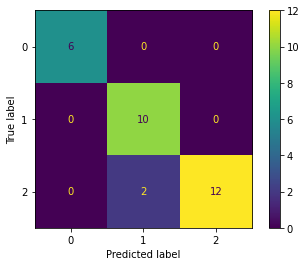

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred1 = logreg.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [45]:
#para train

confusion_matrix(y_train, y_pred2)

array([[44,  0,  0],
       [ 0, 38,  2],
       [ 0,  2, 34]], dtype=int64)

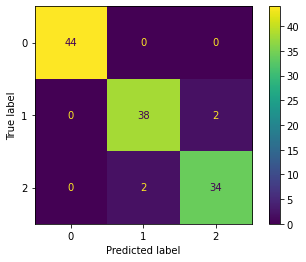

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
y_pred2 = logreg.predict(X_train)
confusion_matrix = metrics.confusion_matrix(y_train, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.